In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns 
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [6]:
df=pd.read_csv('/drive/My Drive/Datasets/exams - exams.csv')
df.head()

,StudentId,gender,group,parental level of education,lunch,test preparation course,math score,reading score,writing score,science score,IQ,Date_of _Evalution
0,Alphabeta12,male,group A,high school,standard,completed,67,67,63,40,NaN,17/07/2016
1,Alphabeta13,female,group D,some high school,free/reduced,none,NaN,59,55,23,NaN,31/01/2016
2,Alphabeta14,male,group E,some college,free/reduced,none,59,60,50,11,NaN,10/12/2011
3,Alphabeta15,male,group B,high school,standard,none,77,78,68,72,NaN,19/09/2017
4,Alphabeta16,male,group E,associate's degree,standard,completed,78,73,68,36,NaN,31/08/2010


**Handling Missing Values.**


In [7]:
df.shape

(1334, 12)

In [8]:
df.isnull().sum()

StudentId                         0
gender                            0
group                             0
parental level of education       1
lunch                             1
test preparation course           0
math score                        9
reading score                    13
writing score                     7
science score                     5
IQ                             1285
Date_of _Evalution                1
dtype: int64

In [9]:
df=df.drop('IQ', axis=1)

In [10]:
df.isnull().sum().sum()

37

In [11]:
df=df.dropna()

**Handling Noise Values**

In [12]:
df.columns

Index(['StudentId', 'gender', 'group', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'science score', 'Date_of _Evalution'],
      dtype='object')

In [13]:
for i in df.columns:
  print(df[i].unique(),'\n')

['Alphabeta12' 'Alphabeta14' 'Alphabeta15' ... 'Alphabeta1343'
 'Alphabeta1344' 'Alphabeta1345'] 

['male' 'female' '5' 'iop' '-' '47' '4' '$' '&'] 

['group A' 'group E' 'group B' 'group D' 'group C' '-' 'dh'] 

['high school' 'some college' "associate's degree" "bachelor's degree"
 'some high school' "master's degree" '&0' '-' '&'] 

['standard' 'free/reduced' 'rt4' '-' '&' 'v'] 

['completed' 'none' '67' '-'] 

['67' '59' '77' '78' '63' '62' '93' '47' '99' '80' '81' '69' '58' '54'
 '23' '39' '83' '71' '44' '46' '51' '53' '74' '33' '87' '40' '65' '79'
 '68' '57' '98' '100' '60' '64' '52' '36' '56' '88' '42' '76' '49' '-'
 '72' '31' '32' '97' '94' '95' '45' '75' '66' '$' '70' '82' '92' '30' '41'
 '43' '55' '73' '48' '86' '84' '50' '89' '91' '85' '61' '35' '90' '96' '@'
 '13' '38' '28' '26' '37' '29' '34' '25' '/' '4' '17' '24' '16' '6' '3'
 '0' '15' '22' '5' '8' '20' '9' '19' '12' '10' '11' '2' '14' '27' '1' '18'
 'ddszvf' '7' 'dfvsd'] 

['67' '60' '78' '73' '77' '59' '88' '56' '42' '

In [15]:
df = df[(df['gender']!='-') & (df['gender']!='$') & (df['gender']!='&')]
df = df[(df['group']!='-') & (df['group']!='dh')]
df = df[(df['parental level of education']!='&0') & (df['parental level of education']!='-') & (df['parental level of education']!='&')]
df = df[(df['lunch']!='rt4') & (df['lunch']!='-') & (df['lunch']!='&') & (df['lunch']!='v')]
df = df[(df['test preparation course']!='67') & (df['test preparation course']!='-')]

In [16]:
#df[~df['math score'] .isin(['$','@','ddszvf', 'dfvsd', '/'])]

In [ ]:
df.columns

Index(['StudentId', 'gender', 'group', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'science score', 'Date_of _Evalution'],
      dtype='object')

In [18]:
df['math score']=pd.to_numeric(df['math score'], errors='coerce')
df['reading score']=pd.to_numeric(df['reading score'], errors='coerce')
df['writing score']=pd.to_numeric(df['writing score'], errors='coerce')
df['science score']=pd.to_numeric(df['science score'], errors='coerce')
df = df[~(df['Date_of _Evalution'] =='-')]
df = df[~(df['Date_of _Evalution'] =='$')]
df = df.replace('/','-', regex=True)

In [19]:
import datetime
df['Date_of _Evalution'] = pd.to_datetime(df['Date_of _Evalution'])
df['Year'] = pd.DatetimeIndex(df['Date_of _Evalution']).year

**Finding maximum, minimum, and average of every score**

In [20]:
df[['math score','reading score','writing score','science score']].max()

math score       100.0
reading score    100.0
writing score    100.0
science score    100.0
dtype: float64

In [21]:
df[['math score','reading score','writing score','science score']].min()

math score       0.0
reading score    0.0
writing score    0.0
science score    0.0
dtype: float64

In [22]:
df[['math score','reading score','writing score','science score']].mean()

math score       62.676494
reading score    63.177407
writing score    63.363927
science score    50.048183
dtype: float64

**Finding maximum, minimum, and average Reading score of male of group C and group D**

In [23]:
df['reading score'][(df['group']=='group C') | (df['group']=='group D')].max()

100.0

In [24]:
df['reading score'][(df['group']=='group C') | (df['group']=='group D')].min()

0.0

In [25]:
df['reading score'][(df['group']=='group C') | (df['group']=='group D')].mean()

62.30226364846871

**Each student's average score.** 


In [26]:
df.head(1)

,StudentId,gender,group,parental level of education,lunch,test preparation course,math score,reading score,writing score,science score,Date_of _Evalution,Year
0,Alphabeta12,male,group A,high school,standard,completed,67.0,67.0,63.0,40.0,2016-07-17,2016


In [31]:
df['average_score']=df[['math score', 'reading score', 'writing score', 'science score']].mean(axis=1)
df_avg = df[['StudentId','average_score']].sort_values(by='average_score', ascending=False)
df_avg

,StudentId,average_score
96,Alphabeta108,98.250000
148,Alphabeta160,97.000000
857,Alphabeta869,95.000000
485,Alphabeta497,94.750000
224,Alphabeta236,94.500000
652,Alphabeta664,93.000000
281,Alphabeta293,92.333333
185,Alphabeta197,92.250000
860,Alphabeta872,91.750000
881,Alphabeta893,91.250000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Alphabeta108'),
  Text(1, 0, 'Alphabeta160'),
  Text(2, 0, 'Alphabeta869'),
  Text(3, 0, 'Alphabeta497'),
  Text(4, 0, 'Alphabeta236'),
  Text(5, 0, 'Alphabeta664'),
  Text(6, 0, 'Alphabeta293'),
  Text(7, 0, 'Alphabeta197'),
  Text(8, 0, 'Alphabeta872'),
  Text(9, 0, 'Alphabeta893')])

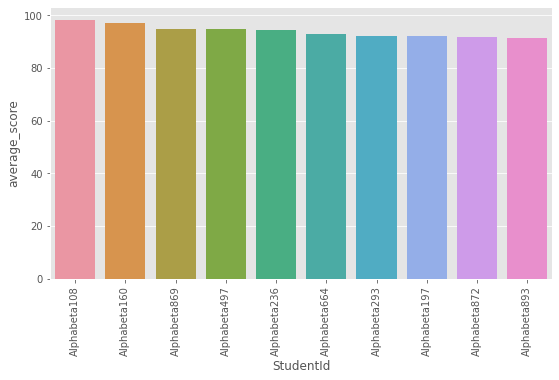

In [36]:

plt.figure(figsize=(9,5))
sns.barplot(data = df_avg.head(10), x='StudentId', y='average_score')
plt.xticks(rotation=90)

**Year in which student's average score is maximum**

In [43]:
df.groupby(df['Year']).average_score.sum().reset_index().max()

Year             2018.000000
average_score    9040.333333
dtype: float64

In [44]:
df.groupby(df['Year']).average_score.sum().reset_index().sort_values(by = 'average_score', ascending = False).head(1)

,Year,average_score
6,2014,9040.333333


In [45]:
df.groupby(df['Year']).average_score.sum().reset_index().nlargest(1,'average_score')

,Year,average_score
6,2014,9040.333333


**First date and last date of evaluation**

In [46]:
df['Date_of _Evalution'].min()

Timestamp('2008-04-12 00:00:00')

In [47]:
df['Date_of _Evalution'].max()

Timestamp('2018-12-29 00:00:00')

**Remove the lunch column.**


In [48]:
df.drop('lunch', axis=1).head(5)

,StudentId,gender,group,parental level of education,test preparation course,math score,reading score,writing score,science score,Date_of _Evalution,Year,average_score
0,Alphabeta12,male,group A,high school,completed,67.0,67.0,63.0,40.0,2016-07-17,2016,59.25
2,Alphabeta14,male,group E,some college,none,59.0,60.0,50.0,11.0,2011-10-12,2011,45.00
3,Alphabeta15,male,group B,high school,none,77.0,78.0,68.0,72.0,2017-09-19,2017,73.75
4,Alphabeta16,male,group E,associate's degree,completed,78.0,73.0,68.0,36.0,2010-08-31,2010,63.75
5,Alphabeta17,female,group D,high school,none,63.0,77.0,76.0,12.0,2010-10-24,2010,57.00


In [49]:
df[df['Year']==2008]	

,StudentId,gender,group,parental level of education,lunch,test preparation course,math score,reading score,writing score,science score,Date_of _Evalution,Year,average_score
279,Alphabeta291,male,group D,high school,standard,completed,75.0,73.0,66.0,30.0,2008-06-12,2008,61.00
327,Alphabeta339,female,group A,high school,standard,none,63.0,69.0,60.0,56.0,2008-12-16,2008,62.00
351,Alphabeta363,female,group E,master's degree,standard,none,47.0,50.0,47.0,80.0,2008-12-24,2008,56.00
450,Alphabeta462,female,group B,high school,standard,completed,55.0,62.0,64.0,19.0,2008-12-23,2008,50.00
543,Alphabeta555,male,group C,associate's degree,standard,completed,63.0,59.0,60.0,11.0,2008-04-12,2008,48.25
770,Alphabeta782,male,group B,some high school,free-reduced,none,76.0,73.0,68.0,92.0,2008-12-16,2008,77.25


**Monthly total number of evaluations every year.**

In [50]:
df['Month']=pd.DatetimeIndex(df['Date_of _Evalution']).month


In [51]:
df.groupby(['Year', 'Month']).agg({'Date_of _Evalution' : pd.Series.nunique})

Date_of _Evalution
Year Month                    
2008 4                       1
     6                       1
     12                      3
2009 1                       7
     2                       3
...                        ...
2018 8                       9
     9                       4
     10                      3
     11                      9
     12                     14

[123 rows x 1 columns]

**Group type and average score**

In [52]:
df.pivot_table(index='group', columns = 'Date_of _Evalution', values = 'average_score', fill_value=0)

Date_of _Evalution,2008-04-12,2008-06-12,2008-12-16,2008-12-23,2008-12-24,2009-01-02,2009-01-03,2009-01-04,2009-01-20,2009-01-21,...,2018-12-13,2018-12-14,2018-12-15,2018-12-16,2018-12-22,2018-12-23,2018-12-25,2018-12-26,2018-12-28,2018-12-29
group,,,,,,,,,,,,,,,,,,,,,
group A,0.00,0,62.00,0,0,0.00,71,0.0,0.00,0.000000,...,0.00,0.0,47.75,0.00,0.0,72.5,57.5,0.00,0.00,0
group B,0.00,0,77.25,50,0,76.25,0,0.0,56.25,0.000000,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,60.75,59.75,35
group C,48.25,0,0.00,0,0,41.00,0,0.0,0.00,47.621212,...,0.00,65.5,0.00,74.75,50.5,0.0,0.0,0.00,0.00,0
group D,0.00,61,0.00,0,0,0.00,0,0.0,0.00,0.000000,...,82.75,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0
group E,0.00,0,0.00,0,56,41.75,0,73.5,0.00,59.500000,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0


**correlation between all numerical values.**


<AxesSubplot:>

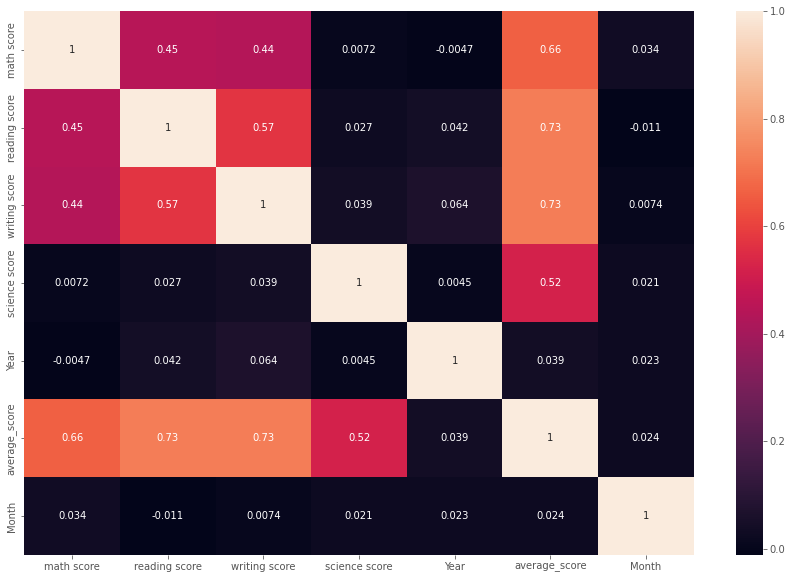

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True)

**Course first and last date of evaluation.**

In [ ]:
df.groupby('test preparation course')['Date_of _Evalution'].min()

test preparation course
completed   2008-04-12
none        2008-12-16
Name: Date_of _Evalution, dtype: datetime64[ns]

In [ ]:
df.pivot_table(values = 'Date_of _Evalution', index = 'test preparation course', aggfunc = ['min', 'max'] )

,min,max
,Date_of _Evalution,Date_of _Evalution
test preparation course,,
completed,2008-04-12,2018-12-29
none,2008-12-16,2018-12-28


**Person whose reading score, writing score, science score and Math score is greater than 50 and their average of reading score, Math score, and writing score greater than 80.**

In [ ]:
df1 = df[ (df['math score'] > 50) & (df['reading score'] >50) & (df['writing score']>50) & (df['science score']>50) & ((df[['math score', 'reading score', 'writing score']].sum(axis=1)/3)>80)]

**mean,median,mode and standard deviation of each group**

In [42]:
df.pivot_table(values='average_score', index='group', aggfunc = ['mean', 'median', 'std'])

,mean,median,std
,average_score,average_score,average_score
group,,,
group A,59.233038,59.750,14.018205
group B,59.811594,59.875,14.398967
group C,56.486318,57.250,15.485274
group D,63.888128,63.875,13.534645
group E,61.812121,64.250,14.882963
